# Cats vs Dogs Project CNN

In [2]:
from numpy.random import seed
seed(1)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
import os 
import pathlib
import cv2
import tensorflow_hub as hub

/kaggle/input/cat-and-dog/## Let make the dataset for the training set

In [4]:
data_dir_tr=pathlib.Path("/kaggle/input/cat-and-dog/training_set/training_set")

In [5]:
image_shape=(180,180)

In [6]:
list(data_dir_tr.glob("*/*.jpg"))[:5]

[PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3443.jpg'),
 PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1942.jpg'),
 PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.375.jpg'),
 PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3259.jpg'),
 PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.790.jpg')]

In [7]:
cats=list(data_dir_tr.glob("cats/*"))

In [8]:
cats[:5]

[PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3498.jpg'),
 PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.891.jpg'),
 PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2842.jpg'),
 PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg'),
 PosixPath('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.115.jpg')]

In [9]:
len(cats)

4001

In [10]:
dogs=list(data_dir_tr.glob("dogs/*"))

In [11]:
len(dogs)

4006

In [12]:
img = cv2.imread(str(dogs[1]))
img

array([[[232, 233, 237],
        [250, 251, 255],
        [253, 254, 255],
        ...,
        [ 10,   9,   5],
        [  9,   8,   4],
        [  8,   7,   3]],

       [[245, 246, 250],
        [253, 254, 255],
        [247, 248, 252],
        ...,
        [ 12,  11,   7],
        [ 11,  10,   6],
        [ 10,   9,   5]],

       [[250, 250, 255],
        [253, 253, 255],
        [242, 242, 248],
        ...,
        [ 11,  10,   6],
        [ 10,   9,   5],
        [  9,   8,   4]],

       ...,

       [[122, 147, 163],
        [126, 152, 168],
        [132, 157, 173],
        ...,
        [102, 135, 150],
        [103, 134, 149],
        [100, 133, 148]],

       [[122, 147, 163],
        [127, 152, 168],
        [132, 157, 173],
        ...,
        [102, 137, 147],
        [101, 136, 146],
        [100, 135, 145]],

       [[122, 147, 163],
        [127, 152, 168],
        [132, 157, 173],
        ...,
        [102, 137, 147],
        [101, 136, 146],
        [101, 136, 146]]

(-0.5, 499.5, 498.5, -0.5)

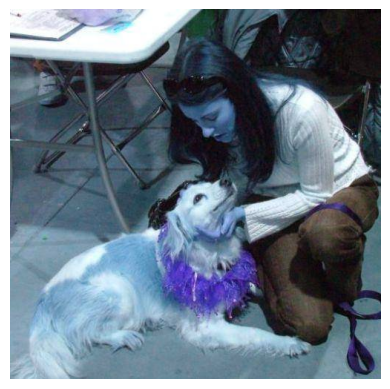

In [13]:
plt.imshow(img)
plt.axis("off")

(-0.5, 499.5, 373.5, -0.5)

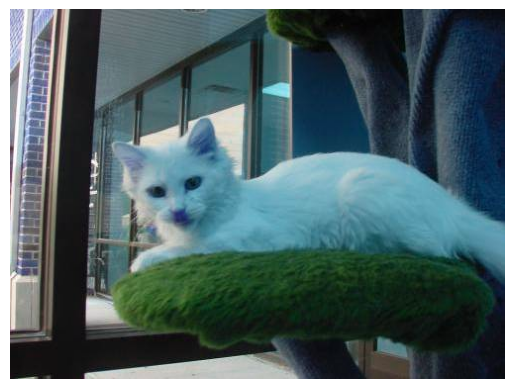

In [14]:
img_ = cv2.imread(str(cats[1]))
plt.imshow(img_)
plt.axis("off")

In [15]:
img.shape

(499, 500, 3)

In [16]:
img_.shape

(374, 500, 3)

## Lets resize the images

In [17]:
img=cv2.resize(img,(180,180))
img_=cv2.resize(img_,(180,180))

(-0.5, 179.5, 179.5, -0.5)

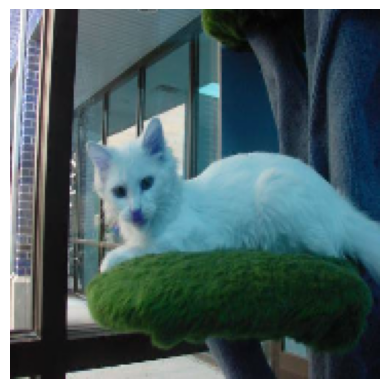

In [18]:
plt.imshow(img_)
plt.axis("off")

(-0.5, 179.5, 179.5, -0.5)

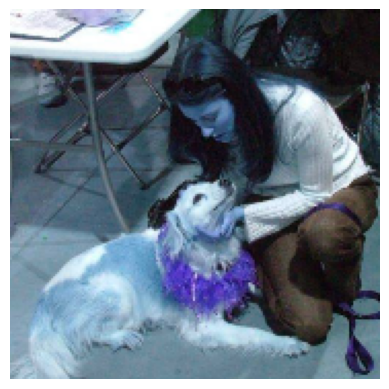

In [19]:
plt.imshow(img)
plt.axis("off")

In [20]:
animal_images_dict={
    'cats': list(data_dir_tr.glob('cats/*')),
    'dogs': list(data_dir_tr.glob('dogs/*')),
}

In [21]:
animal_labels_dict={
    "cats":0,
    "dogs":1
}

## Lets copy and resize the images on to the disc 

In [22]:
X_train,y_train=[],[]

for image_labels,images in animal_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        if(type(img) == type(None)):
               pass
        else:
            resized_img=cv2.resize(img,(180,180))
            X_train.append(resized_img)
            y_train.append(animal_labels_dict[image_labels])
        

In [23]:
len(X_train)

8005

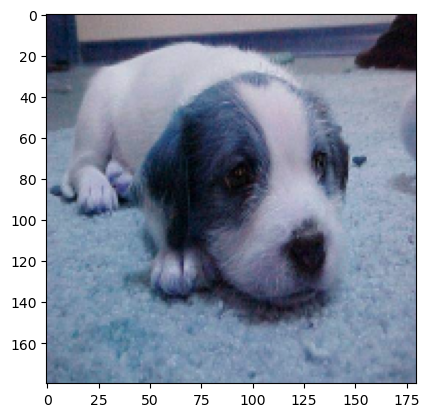

In [24]:
plt.imshow(X_train[4300])

In [25]:
y_train[4300]

1

In [26]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [27]:
X_train

array([[[[123, 207, 232],
         [122, 206, 231],
         [124, 208, 232],
         ...,
         [ 11,  30,  27],
         [115, 168, 169],
         [111, 189, 196]],

        [[118, 201, 227],
         [116, 200, 225],
         [117, 201, 226],
         ...,
         [  6,  22,  20],
         [ 57,  94,  96],
         [ 65, 113, 123]],

        [[121, 205, 230],
         [118, 202, 226],
         [118, 202, 226],
         ...,
         [  0,   7,   7],
         [  0,   4,   5],
         [  1,   8,  14]],

        ...,

        [[ 92, 181, 191],
         [ 70, 152, 161],
         [ 68, 142, 149],
         ...,
         [107, 202, 228],
         [103, 198, 226],
         [110, 206, 236]],

        [[ 99, 191, 202],
         [ 88, 176, 186],
         [ 70, 150, 157],
         ...,
         [108, 205, 231],
         [105, 200, 228],
         [106, 199, 230]],

        [[111, 205, 217],
         [108, 198, 208],
         [ 94, 177, 185],
         ...,
         [106, 206, 231],
        

## Lets perform all theabove steps for the training data

In [28]:
data_dir_tst=pathlib.Path("/kaggle/input/cat-and-dog/training_set/training_set")

In [29]:
animal_images_dict_tst={
    'cats': list(data_dir_tst.glob('cats/*')),
    'dogs': list(data_dir_tst.glob('dogs/*')),
}

In [30]:
animal_labels_dict_tst={
    "cats":0,
    "dogs":1
}

In [31]:
X_test,y_test=[],[]

for image_labels,images in animal_images_dict_tst.items():
    for image in images:
        img=cv2.imread(str(image))
        if(type(img) == type(None)):
               pass
        else:
            resized_img=cv2.resize(img,(180,180))
            X_test.append(resized_img)
            y_test.append(animal_labels_dict_tst[image_labels])

In [32]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [33]:
X_test

array([[[[123, 207, 232],
         [122, 206, 231],
         [124, 208, 232],
         ...,
         [ 11,  30,  27],
         [115, 168, 169],
         [111, 189, 196]],

        [[118, 201, 227],
         [116, 200, 225],
         [117, 201, 226],
         ...,
         [  6,  22,  20],
         [ 57,  94,  96],
         [ 65, 113, 123]],

        [[121, 205, 230],
         [118, 202, 226],
         [118, 202, 226],
         ...,
         [  0,   7,   7],
         [  0,   4,   5],
         [  1,   8,  14]],

        ...,

        [[ 92, 181, 191],
         [ 70, 152, 161],
         [ 68, 142, 149],
         ...,
         [107, 202, 228],
         [103, 198, 226],
         [110, 206, 236]],

        [[ 99, 191, 202],
         [ 88, 176, 186],
         [ 70, 150, 157],
         ...,
         [108, 205, 231],
         [105, 200, 228],
         [106, 199, 230]],

        [[111, 205, 217],
         [108, 198, 208],
         [ 94, 177, 185],
         ...,
         [106, 206, 231],
        

In [34]:
X_train=X_train/255
X_test=X_test/255

In [35]:
X_test.shape

(8005, 180, 180, 3)

## Now lets build the CNN model

In [36]:
model=keras.Sequential([
    keras.layers.Conv2D(16,3,input_shape=(180,180,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1,activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)       0

In [37]:
model.compile(
       optimizer="adam",
       loss="binary_crossentropy",
       metrics=["accuracy"]
)

In [38]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 162s 641ms/step - loss: 0.6641 - accuracy: 0.6115
Epoch 2/5
251/251 [==============================] - 153s 609ms/step - loss: 0.5478 - accuracy: 0.7192
Epoch 3/5
251/251 [==============================] - 154s 613ms/step - loss: 0.4709 - accuracy: 0.7728
Epoch 4/5
251/251 [==============================] - 153s 608ms/step - loss: 0.3992 - accuracy: 0.8157
Epoch 5/5
251/251 [==============================] - 153s 609ms/step - loss: 0.3072 - accuracy: 0.8688


In [39]:
model.evaluate(X_test,y_test)

251/251 [==============================] - 49s 194ms/step - loss: 0.2761 - accuracy: 0.8785


[0.27611806988716125, 0.8784509897232056]

## Model Building with Data Augmentation to ensure the generalization of the model

In [40]:
Data_Augmentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
    
])

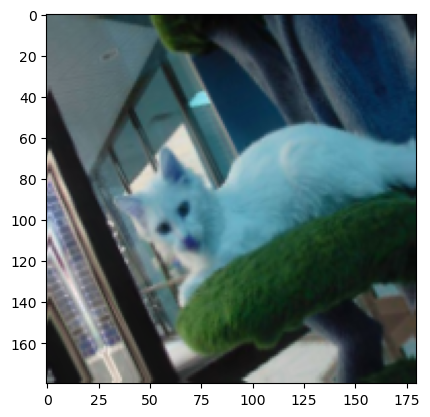

In [41]:
plt.imshow(Data_Augmentation(X_test[1]))

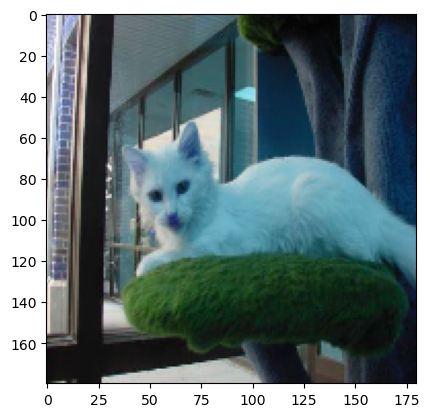

In [42]:
plt.imshow(X_test[1])

In [43]:
model_=keras.Sequential([
    Data_Augmentation,
    keras.layers.Conv2D(16,3,input_shape=(180,180,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1,activation="sigmoid")
])



In [44]:
model_.compile(
       optimizer="adam",
       loss="binary_crossentropy",
       metrics=["accuracy"]
)

In [45]:
model_.fit(X_train,y_train,epochs=5)

Epoch 1/5
251/251 [==============================] - 185s 711ms/step - loss: 0.6639 - accuracy: 0.6050
Epoch 2/5
251/251 [==============================] - 181s 721ms/step - loss: 0.6068 - accuracy: 0.6721
Epoch 3/5
251/251 [==============================] - 181s 721ms/step - loss: 0.5506 - accuracy: 0.7214
Epoch 4/5
251/251 [==============================] - 189s 752ms/step - loss: 0.5257 - accuracy: 0.7400
Epoch 5/5
251/251 [==============================] - 182s 727ms/step - loss: 0.4941 - accuracy: 0.7620


In [46]:
model_.evaluate(X_test,y_test)

251/251 [==============================] - 45s 179ms/step - loss: 0.4611 - accuracy: 0.7826


[0.4610687494277954, 0.7826358675956726]